# Choosing E-Commerce Platform Development with Linear Regression

One day, I just got some contract work with an E-Commerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired me on contract to help them figure it out! So, I decide to use Machine Learning modeling with Linear Regression method to get insight for this problem.

<b> Source dataset: Fake Dataset for Project Practice in Purwadhika School </b>

## Imports Libraries
Import the necessary libraries. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Get the Data

I will work with the E-Commerce Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns. 

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

> **All this info are fake, so there is no confidential issue.**


In [2]:
customers = pd.read_csv('Ecommerce Customers')

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


> **After get the data, I checked the contain of dataset. It seems clean enough, so we can start the EDA.**

In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


> **After put the csv data to the dataframe "customers", I checked the data cleanliness. I didn't found any anomali (like a null cell), so we can continue to eksplore and analyze the data.**

## Exploratory Data Analysis

Let's explore the data!

In [6]:
from scipy.stats import pearsonr #I use this additional libraries to show the correlation value on the plot.
sns.set(style="darkgrid", color_codes=True)

> **I will use Seaborn to create a jointplot to compare the <font color=royalblue>Time on Website</font>  and <font color=royalblue>Yearly Amount Spent</font> columns.** 

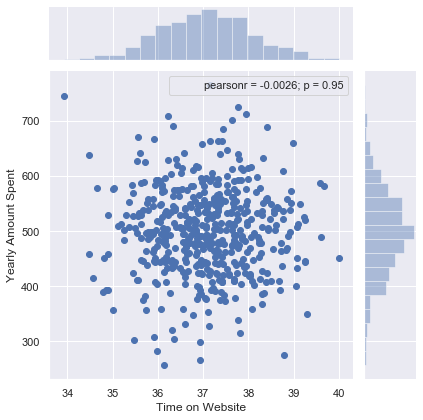

In [31]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers).annotate(pearsonr)

> **Then, compare the <font color=royalblue>Time on App</font> and <font color=royalblue>Yearly Amount Spent</font> columns.** 

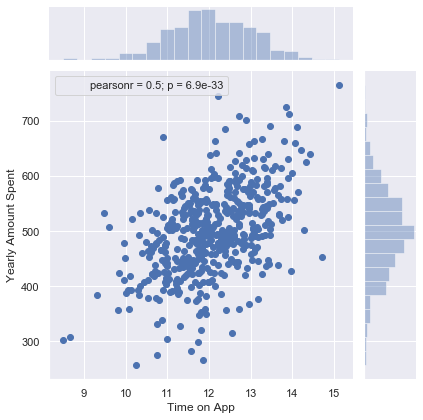

In [8]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers).annotate(pearsonr)

> **Now, I use Seaborn Jointplot to create a 2D hex bin plot comparing <font color=royalblue>Time on App</font> and <font color=royalblue>Length of Membership</font>.**

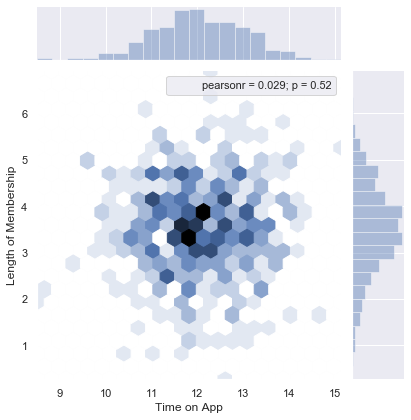

In [9]:
sns.jointplot(x = 'Time on App', y='Length of Membership', data=customers, kind='hex').annotate(pearsonr)

> **Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.**

AttributeError: 'PairGrid' object has no attribute 'annotate'

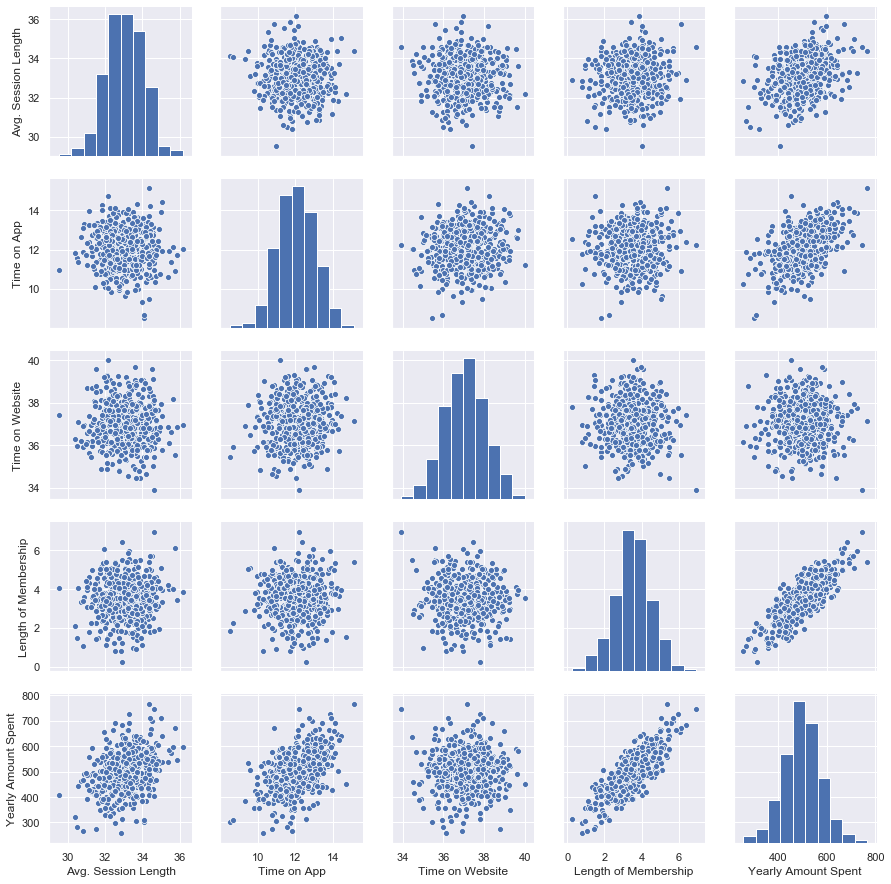

In [10]:
sns.pairplot(customers).annotate(pearsonr)

> <b>Based of this plot we can look that <font color=royalblue>Length of Membership</font> column is the most correlated feature with <font color=royalblue>Yearly Amount Spent</font>. It makes sense because the longer you are become a member the bigger your possibility to spent more money on it. We can see that on the correlation value table also.</b>

In [11]:
customers.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


> **Create a linear model plot (using seaborn's lmplot) of  <font color=royalblue>Yearly Amount Spent</font> vs. <font color=royalblue>Length of Membership</font>.**

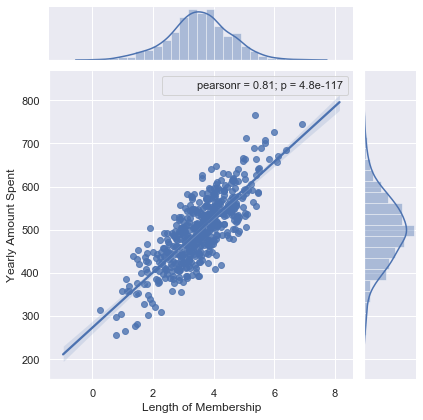

In [12]:
sns.jointplot(x='Length of Membership', y='Yearly Amount Spent', data=customers, kind='reg').annotate(pearsonr)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.<br>

In [13]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


> **I set a variable "X" equal to the numerical features of the customers and a variable "Y" equal to the <font color=royalblue>Yearly Amount Spent</font> column.**

In [14]:
X = customers.select_dtypes(exclude='object').drop('Yearly Amount Spent', axis=1)
Y = customers['Yearly Amount Spent']

> **I use model_selection.train_test_split from sklearn library to split the data into training and testing sets. <br> I set test_size=0.3 and random_state=101. It means I split the existing dataset into 70% for data training, and 30% for data test**

In [15]:
from sklearn.model_selection import train_test_split 

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

> **I need to import LinearRegression from sklearn.linear_model library.**

In [17]:
from sklearn.linear_model import LinearRegression

> **Then, create an instance of a LinearRegression() model named lm.**

In [18]:
lm = LinearRegression()

> **Train/fit lm on the training data.**

In [19]:
lm.fit(X_train,Y_train)

LinearRegression()

> **Print out the coefficients of the model**

In [20]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

> **Use lm.predict() to predict off the X_test set of the data.**

In [21]:
prediction = lm.predict(X_test)

In [22]:
prediction

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

> **Create a scatterplot of the real test values versus the predicted values.**

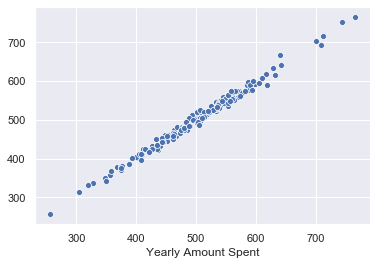

In [26]:
sns.scatterplot(Y_test, prediction)

> **It seems that our Model has a good prediction.**

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

> **Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.** <br>
Reference: [studytonight.com](https://www.studytonight.com/post/what-is-mean-squared-error-mean-absolute-error-root-mean-squared-error-and-r-squared)

In [27]:
from sklearn import metrics 

In [29]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))
print('R2 Score:', metrics.r2_score(Y_test,prediction))

MAE: 7.2281486534308295
MSE: 79.8130516509743
RMSE: 8.933815066978626
R2 Score: 0.9890046246741234


## Residuals

We should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

> **I plotted a histogram of the residuals, it looks normally distributed.**

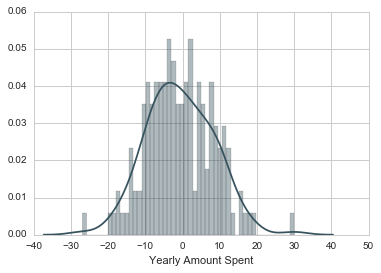

## Conclusion
We still want to figure out the answer to the original question, do we focus our effort on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

>**Let's see the Coefficient dataframe below.**

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**And this is what I suggest to the E-Commerce company:**
> **We can see that Lengh of Membership has a top coefficient value. It means that is the most important variable to get the high customer's <font color=royalblue>Yearly Amount Spent</font>. Let's see another coefficient value. <font color=royalblue>Time on App</font> has the bigger value than <font color=royalblue>Time on Website</font>. <font color=orangered>It indicates us to focus our effort on Mobile App</font> rather than Website Development. <br>
We should make a good UI/UX on the Mobile App to make customer feels great during their time on the app. It will lead to the longer Length of Membership, and will be converted to the better <font color=royalblue>Yearly Amount Spent</font> by the customer.**

## Thank You

See you in another Data Exploration.

**BR,<br>
Erwindra Rusli<br>
Data Scientist Student in Purwadhika School**